In [1]:
#get absolute working directory name
import os
os.getcwd()

'C:\\Users\\syao\\OneDrive - ATC Tires Pvt. Ltd\\Python Project'

In [62]:
#laod the package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
##renders plot inline on your page. 
%matplotlib inline 

In [3]:
sales = pd.ExcelFile('C:/Users/syao/OneDrive - ATC Tires Pvt. Ltd/Python Project/Data/Final Sales database 2014 to 2018.xlsx')

In [4]:
#set global option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
sales_db = sales.parse('Sheet1')

#sales = pd.read_excel(r'C:\Users\syao\OneDrive - ATC Tires Pvt. Ltd\Python Project\Data\Final Sales database 2014 to 2018.xlsx') r will convert the normal string to a raw string

In [6]:
sales_db.head(6)

,Customer,Group,Invoice No.,Posting Date,Year,Order No./Pre-Assigned No.,Item No.,Parent,Size,Description,Quantity,Description.1,Size.1,Location,Customer Type,Branch Code,X Branch (AM/OE),Ship-to State Code,Territory,Salesperson,Ship-to Country,Ship-to City,X Sales,Ship-to Name,Brand,Category,Dashboard Category,Final Category,Vendor Source,Channel
0,8196 - WINGFOOT COMMERCIAL TIRE,WINGFOOT,SI173893,2014-07-23,2014,SO250461,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,4.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M-GAP,AM,AM,WI,N Central,Dallas Ransom,US,OAK CREEK,1580.00,WINGFOOT COMMERCIAL TIRE,GALAXY,AGR,LG,LG,DURO01,WAREHOUSE
1,70000 - DEL-NAT CORPORATION,NaN,SI168098,2014-05-22,2014,SO236308,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,1.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M-GAP,AM,AM,TN,Southeast,Blaine Cox,US,MEMPHIS,418.16,DEL-NAT CORPORATION,GALAXY,AGR,LG,LG,DURO01,WAREHOUSE
2,"8756 - MALONE WAREHOUSE TIRE, INC.",NaN,SI163425,2014-04-03,2014,SO230913,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,1.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M-GAP,AM,AM,OH,Northeast,Mark Scanlon,US,ATHENS,418.16,"MALONE WAREHOUSE TIRE, INC.",GALAXY,AGR,LG,LG,DURO01,WAREHOUSE
3,601175 - CENTRAL TIRE SERVICE INC,NaN,SI159336,2014-02-14,2014,SO223246,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,2.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M,AM,AM,NY,Northeast,Keith Browne,US,BAY SHORE,871.12,CENTRAL TIRE SERVICE INC,GALAXY,AGR,LG,LG,DURO01,WAREHOUSE
4,601175 - CENTRAL TIRE SERVICE INC,NaN,CR107005,2014-02-26,2014,SC103435,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,-2.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M,AM,AM,NY,Northeast,Keith Browne,US,BAY SHORE,-871.12,CENTRAL TIRE SERVICE INC,GALAXY,AGR,LG,LG,DURO01,WAREHOUSE
5,601175 - CENTRAL TIRE SERVICE INC,NaN,CR107005,2014-02-26,2014,SC103435,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,2.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M,AM,AM,NY,Northeast,Keith Browne,US,BAY SHORE,760.00,CENTRAL TIRE SERVICE INC,GALAXY,AGR,LG,LG,DURO01,WAREHOUSE


In [7]:
sales_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512019 entries, 0 to 512018
Data columns (total 30 columns):
Customer                      512019 non-null object
Group                         175295 non-null object
Invoice No.                   512019 non-null object
Posting Date                  512019 non-null datetime64[ns]
Year                          512019 non-null int64
Order No./Pre-Assigned No.    505571 non-null object
Item No.                      512019 non-null object
Parent                        512019 non-null object
Size                          512003 non-null object
Description                   512005 non-null object
Quantity                      512016 non-null float64
Description.1                 512019 non-null object
Size.1                        512006 non-null object
Location                      512019 non-null object
Customer Type                 503106 non-null object
Branch Code                   512019 non-null object
X Branch (AM/OE)              512

In [8]:
#add ASP column
sales_db['ASP']= sales_db['X Sales'] / sales_db.Quantity

In [9]:
sales_db.head(4)

,Customer,Group,Invoice No.,Posting Date,Year,Order No./Pre-Assigned No.,Item No.,Parent,Size,Description,Quantity,Description.1,Size.1,Location,Customer Type,Branch Code,X Branch (AM/OE),Ship-to State Code,Territory,Salesperson,Ship-to Country,Ship-to City,X Sales,Ship-to Name,Brand,Category,Dashboard Category,Final Category,Vendor Source,Channel,ASP
0,8196 - WINGFOOT COMMERCIAL TIRE,WINGFOOT,SI173893,2014-07-23,2014,SO250461,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,4.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M-GAP,AM,AM,WI,N Central,Dallas Ransom,US,OAK CREEK,1580.00,WINGFOOT COMMERCIAL TIRE,GALAXY,AGR,LG,LG,DURO01,WAREHOUSE,395.00
1,70000 - DEL-NAT CORPORATION,NaN,SI168098,2014-05-22,2014,SO236308,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,1.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M-GAP,AM,AM,TN,Southeast,Blaine Cox,US,MEMPHIS,418.16,DEL-NAT CORPORATION,GALAXY,AGR,LG,LG,DURO01,WAREHOUSE,418.16
2,"8756 - MALONE WAREHOUSE TIRE, INC.",NaN,SI163425,2014-04-03,2014,SO230913,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,1.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M-GAP,AM,AM,OH,Northeast,Mark Scanlon,US,ATHENS,418.16,"MALONE WAREHOUSE TIRE, INC.",GALAXY,AGR,LG,LG,DURO01,WAREHOUSE,418.16
3,601175 - CENTRAL TIRE SERVICE INC,NaN,SI159336,2014-02-14,2014,SO223246,135271-77,135271,33X1550-16.5,GALAXY MIGHTY MOW R3 10PR TL,2.0,GALAXY MIGHTY MOW R3 10PR TL,33X1550-16.5,MEMPHIS,A/M,AM,AM,NY,Northeast,Keith Browne,US,BAY SHORE,871.12,CENTRAL TIRE SERVICE INC,GALAXY,AGR,LG,LG,DURO01,WAREHOUSE,435.56


In [10]:
sales_db_v1 = sales_db.copy().drop(['Size', 'Description','Order No./Pre-Assigned No.'], axis = 1)

In [11]:
#explort how many dashboard category
sales_db_v1['Final Category'].value_counts()

AGR                152962
Truck              148796
SS                  60930
CU                  58658
Bias OTR            21318
FOR                 18497
Radial OTR          15193
IND                 12077
LG                   8486
Trailer Service      8179
SOLID                4995
OTHER                1594
Other                 334
Name: Final Category, dtype: int64

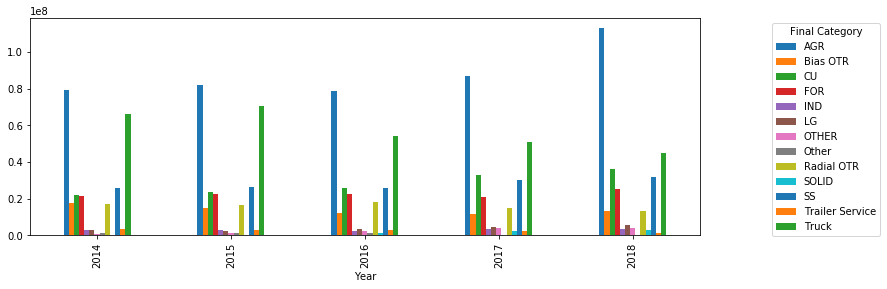

In [12]:
#analyzing sales by category and channel

ax = sales_db_v1.groupby(['Year','Final Category'])['X Sales'].sum().unstack().plot(kind = 'bar',figsize=(12,4) )

ax.get_legend().set_bbox_to_anchor((1.1, 1))

plt.show()

## RFM Score Calculating
R: Recency, days since last purchase
F: Frequency, total number of purchase
M: Total money this customer spent 

In [13]:
# filter on US AM sales
sales_us_am = sales_db_v1.loc[(sales_db_v1['Ship-to Country']=="US") & (sales_db_v1['Branch Code']=='AM')]

In [14]:
#check missing value in each columns
sales_us_am.isnull().sum(axis = 0)

Customer                   0
Group                 313985
Invoice No.                0
Posting Date               0
Year                       0
Item No.                   0
Parent                     0
Quantity                   0
Description.1              0
Size.1                    10
Location                   0
Customer Type           8399
Branch Code                0
X Branch (AM/OE)           0
Ship-to State Code       115
Territory                115
Salesperson              115
Ship-to Country            0
Ship-to City            8388
X Sales                    0
Ship-to Name               1
Brand                      0
Category                   0
Dashboard Category         0
Final Category             0
Vendor Source            206
Channel                   18
ASP                     6771
dtype: int64

In [15]:
#check negative value and then remove negative values in Quantity/Sales
sales_us_am['Quantity'].min()

sales_us_am = sales_us_am[(sales_us_am['X Sales']>0)]

In [16]:
sales_us_am.info()

sales_us_am.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453006 entries, 0 to 512018
Data columns (total 28 columns):
Customer              453006 non-null object
Group                 149124 non-null object
Invoice No.           453006 non-null object
Posting Date          453006 non-null datetime64[ns]
Year                  453006 non-null int64
Item No.              453006 non-null object
Parent                453006 non-null object
Quantity              453006 non-null float64
Description.1         453006 non-null object
Size.1                452996 non-null object
Location              453006 non-null object
Customer Type         445804 non-null object
Branch Code           453006 non-null object
X Branch (AM/OE)      453006 non-null object
Ship-to State Code    452900 non-null object
Territory             452900 non-null object
Salesperson           452900 non-null object
Ship-to Country       453006 non-null object
Ship-to City          445841 non-null object
X Sales               4530

,Year,Quantity,X Sales,ASP
count,453006.000000,453006.000000,453006.000000,453006.000000
mean,2015.844406,8.436211,2310.297423,432.610951
std,1.378762,17.713731,3910.776763,553.816270
min,2014.000000,1.000000,1.000000,0.877143
25%,2015.000000,2.000000,515.685000,170.230000
50%,2016.000000,4.000000,1144.640000,221.230000
75%,2017.000000,8.000000,2500.297500,414.852500
max,2018.000000,800.000000,167929.980000,54052.000000


In [17]:
#check last order dates
sales_us_am['Posting Date'].max()

Timestamp('2018-12-31 00:00:00')

In [18]:
import datetime as dt
#use 2019.1.1 as the point of time to calcuate the recencey
now = dt.datetime(2019,1,1)

In [19]:
#create RFM table for customer segmation
rfmTable = sales_us_am.groupby('Customer').agg({'Posting Date': lambda x:(now - x.max()).days, 'Invoice No.': lambda x:len(x), 
                                                'X Sales': lambda x: x.sum()})

In [20]:
rfmTable['Posting Date'] = rfmTable['Posting Date'].astype(int)

In [21]:
rfmTable.rename(columns = {'Posting Date':'Recency', 'Invoice No.': 'Frequency', 'X Sales':'Monetary_Value'}, inplace = True)

In [22]:
rfmTable.head(4)

,Recency,Frequency,Monetary_Value
Customer,,,
010130 - AAL-STAR TIRE,757,16,21729.87
0101570 - J & O TIRE,755,57,361554.55
"01070 - ALLIED OIL & SUPPLY, INC.",888,6,16534.52
01074 - REDDING VALLEY TIRE INC,777,101,213172.40


In [23]:
#split customers by using quartiles
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 161.0, 0.5: 740.0, 0.75: 894.5},
 'Frequency': {0.25: 3.0, 0.5: 15.0, 0.75: 89.5},
 'Monetary_Value': {0.25: 6349.085000000001, 0.5: 35241.84, 0.75: 223444.435}}

In [24]:
#create a segmented RFM table
segmented_rfm = rfmTable

In [25]:
#function to assign the score, d is dataframe and p is column, x mean apply to which column
def RScore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<= d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
def FMScore(x, p, d):
    if x<=d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [26]:
#add segment to newly created segmentated RFM table
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore,args = ('Recency', quantiles))

segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore,args = ('Frequency', quantiles))

segmented_rfm['m_quartile'] = segmented_rfm['Monetary_Value'].apply(FMScore,args = ('Monetary_Value', quantiles))

In [27]:
segmented_rfm.head(4)

,Recency,Frequency,Monetary_Value,r_quartile,f_quartile,m_quartile
Customer,,,,,,
010130 - AAL-STAR TIRE,757,16,21729.87,3,2,3
0101570 - J & O TIRE,755,57,361554.55,3,2,1
"01070 - ALLIED OIL & SUPPLY, INC.",888,6,16534.52,3,3,3
01074 - REDDING VALLEY TIRE INC,777,101,213172.40,3,1,2


In [28]:
#add new column to combine thr rfm score, map return a list of result by apply the str function
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str)+segmented_rfm.f_quartile.map(str)+segmented_rfm.m_quartile.map(str)

In [29]:
#get top 200 customers
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('Monetary_Value', ascending = False)

,Recency,Frequency,Monetary_Value,r_quartile,f_quartile,m_quartile,RFMScore
Customer,,,,,,,
C0001774 - TWIN VALLEY TIRE,1,3198,17791691.20,1,1,1,111
C0000351 - GCR TIRE CENTERS,1,5977,17630134.30,1,1,1,111
C0002311 - DUNLAP & KYLE,1,4707,15706500.32,1,1,1,111
C0009125 - SOUTHERN TIRE MART,1,4409,15145871.96,1,1,1,111
C0001728 - BEN TIRE DISTRIBUTORS,4,3096,11342905.63,1,1,1,111
C0002307 - BLACK'S TIRE SERVICE INC.,4,4436,8224976.22,1,1,1,111
"C0048753 - POMP'S TIRE SERVICE, INC.",1,3117,8155273.48,1,1,1,111
C0002227 - BAUER BUILT TIRE,14,893,8005363.46,1,1,1,111
"C0033776 - GALLAGHER TIRE, INC.",4,3469,7783386.20,1,1,1,111


In [30]:
# How many customers we have in each segments
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFMScore']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['f_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['m_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFMScore']=='211']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='444']))

Best Customers:  171
Loyal Customers:  547
Big Spenders:  547
Almost Lost:  159
Lost Customers:  17
Lost Cheap Customers:  238


In [31]:
#write the result to excel file
writer = pd.ExcelWriter('rfm_score.xlsx', engine = 'xlsxwriter')

segmented_rfm.sort_values(by = ['RFMScore','Monetary_Value'], ascending=[True, False]).to_excel(writer,'Sheet1')

writer.save()

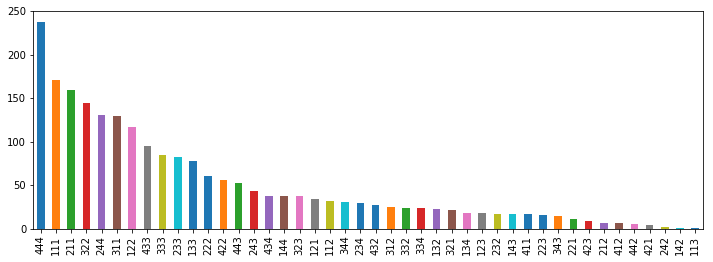

In [32]:
#count members in each segment
segmented_rfm["RFMScore"].value_counts().plot(kind = 'bar', figsize = (12,4))

## Customer Basket Size Analysis

In [33]:
#build k-means clustering model
#look at dataset again
data_stat = sales_us_am.describe()
data_stat

,Year,Quantity,X Sales,ASP
count,453006.000000,453006.000000,453006.000000,453006.000000
mean,2015.844406,8.436211,2310.297423,432.610951
std,1.378762,17.713731,3910.776763,553.816270
min,2014.000000,1.000000,1.000000,0.877143
25%,2015.000000,2.000000,515.685000,170.230000
50%,2016.000000,4.000000,1144.640000,221.230000
75%,2017.000000,8.000000,2500.297500,414.852500
max,2018.000000,800.000000,167929.980000,54052.000000


In [34]:
#explore basket size
sales_order = sales_us_am.groupby(by=['Customer','Invoice No.']).agg({'X Sales': lambda x: x.sum()})

In [35]:
sales_order['X Sales'].min()

24.54

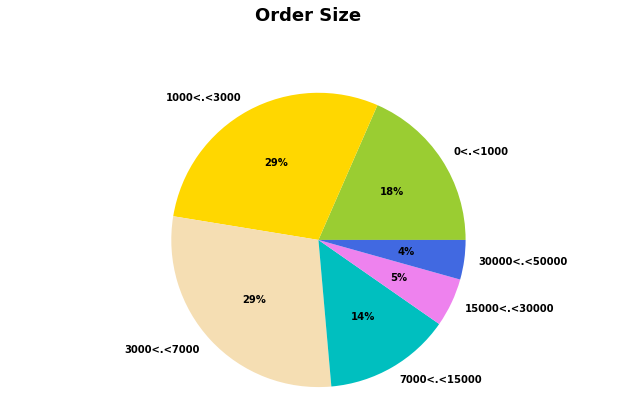

In [36]:
sales_range = [0, 1000, 3000, 7000, 15000, 30000, 50000]
count_price = []
for i, price in enumerate(sales_range):
    if i == 0: continue
    val = sales_order[(sales_order['X Sales'] < price) &
                       (sales_order['X Sales'] > sales_range[i-1])]['X Sales'].count()
    count_price.append(val)
# draw pie chart        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(sales_range[i-1], s) for i,s in enumerate(sales_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Order Size", ha='center', fontsize = 18);

## Clustering Modeling by Category and Channel

Find customer annual spending in each category and channel(geo location?) only look at recent 3 years

In [37]:
cat_temp_table = sales_us_am.loc[sales_us_am['Year']>2015,:].groupby(['Customer','Final Category', 'Channel']).agg({'X Sales': lambda x: x.sum()})

In [38]:
cat_temp_table.head(10)

X Sales
Customer                          Final Category  Channel            
010130 - AAL-STAR TIRE            Radial OTR      WAREHOUSE  14371.68
0101570 - J & O TIRE              Bias OTR        WAREHOUSE  33459.60
                                  CU              WAREHOUSE   8711.32
                                  IND             WAREHOUSE   7079.87
                                  SS              WAREHOUSE   4348.24
                                  Truck           WAREHOUSE  12698.00
01070 - ALLIED OIL & SUPPLY, INC. Trailer Service WAREHOUSE   3300.00
01074 - REDDING VALLEY TIRE INC   AGR             WAREHOUSE   4152.00
                                  Bias OTR        WAREHOUSE  35941.96
                                  CU              WAREHOUSE  17246.35

In [39]:
#spread category
cat_table = cat_temp_table.pivot_table(index = ['Customer','Channel'], columns = 'Final Category', values = 'X Sales')

In [40]:
#reset index to columns
cat_table.reset_index(inplace = True)

In [41]:
#impute na as 0
cat_table.fillna(0, inplace = True)

In [42]:
#encoding channel by using getDummy fun in PD
from sklearn.preprocessing import LabelBinarizer

In [43]:
cat_table_final = pd.get_dummies(cat_table, columns = ['Channel'])

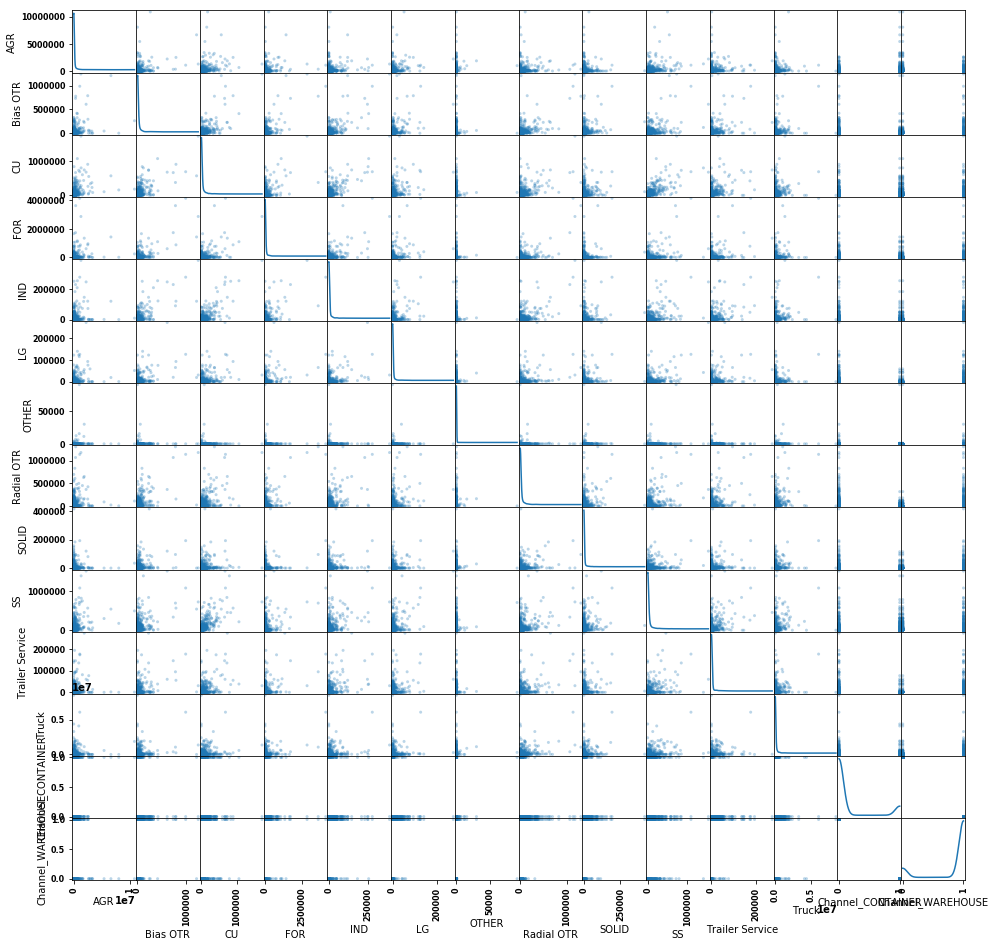

In [44]:
#viz the feature distribution
pd.plotting.scatter_matrix(cat_table_final, alpha = 0.3, figsize = (16,16), diagonal = 'kde');

In [45]:
#set customer as index
cat_table_final.set_index('Customer', inplace = True)

In [46]:
#get correlation scores
cat_table_final.corr()

,AGR,Bias OTR,CU,FOR,IND,LG,OTHER,Radial OTR,SOLID,SS,Trailer Service,Truck,Channel_CONTAINER,Channel_WAREHOUSE
AGR,1.000000,0.367226,0.389519,0.227721,0.227925,0.295235,0.092562,0.187481,0.090297,0.392768,0.173616,0.149899,0.231279,-0.231279
Bias OTR,0.367226,1.000000,0.686185,0.709983,0.719622,0.476206,0.002351,0.624816,0.294366,0.531132,0.389120,0.257024,0.011195,-0.011195
CU,0.389519,0.686185,1.000000,0.525783,0.775114,0.442869,0.020852,0.588905,0.228510,0.734751,0.483680,0.250750,0.148794,-0.148794
FOR,0.227721,0.709983,0.525783,1.000000,0.598126,0.385875,-0.000058,0.615283,0.246900,0.413668,0.432461,0.318117,0.023424,-0.023424
IND,0.227925,0.719622,0.775114,0.598126,1.000000,0.436624,-0.000854,0.580026,0.235528,0.543520,0.483951,0.255303,0.031675,-0.031675
LG,0.295235,0.476206,0.442869,0.385875,0.436624,1.000000,0.019394,0.368352,0.258927,0.527948,0.346359,0.152706,-0.037832,0.037832
OTHER,0.092562,0.002351,0.020852,-0.000058,-0.000854,0.019394,1.000000,0.018152,0.013486,0.154785,-0.000391,0.043941,0.040990,-0.040990
Radial OTR,0.187481,0.624816,0.588905,0.615283,0.580026,0.368352,0.018152,1.000000,0.330732,0.490555,0.463356,0.346732,-0.061569,0.061569
SOLID,0.090297,0.294366,0.228510,0.246900,0.235528,0.258927,0.013486,0.330732,1.000000,0.298077,0.195188,0.208687,-0.002773,0.002773
SS,0.392768,0.531132,0.734751,0.413668,0.543520,0.527948,0.154785,0.490555,0.298077,1.000000,0.441034,0.306774,0.148365,-0.148365


## Clustering 

In [54]:
#find the best clusters by apply the silhouette score
matrix = cat_table_final.copy().drop(['Channel_CONTAINER','Channel_WAREHOUSE'], axis =1).values

For n_clusters = 2 The average silhouette_score is : 0.9289209674158396
For n_clusters = 3 The average silhouette_score is : 0.8806374368846344
For n_clusters = 4 The average silhouette_score is : 0.8600322254342155
For n_clusters = 5 The average silhouette_score is : 0.8643922522846073
For n_clusters = 6 The average silhouette_score is : 0.7602620529029975
For n_clusters = 7 The average silhouette_score is : 0.810346911056969
For n_clusters = 8 The average silhouette_score is : 0.7353916853720254
For n_clusters = 9 The average silhouette_score is : 0.7297406288902561


In [60]:
##standardized the data set
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [89404.90942693 15210.93523878 25519.73563992 32198.30938395
  4036.03126074  2229.19323305    95.81758835 20153.56675263
  2973.89793696 27199.1743362   2830.35788921 73422.23189589]


### PCA

In [61]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

NameError: name 'PCA' is not defined

In [ ]:
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [58]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.8596161964108419


In [56]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 16)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

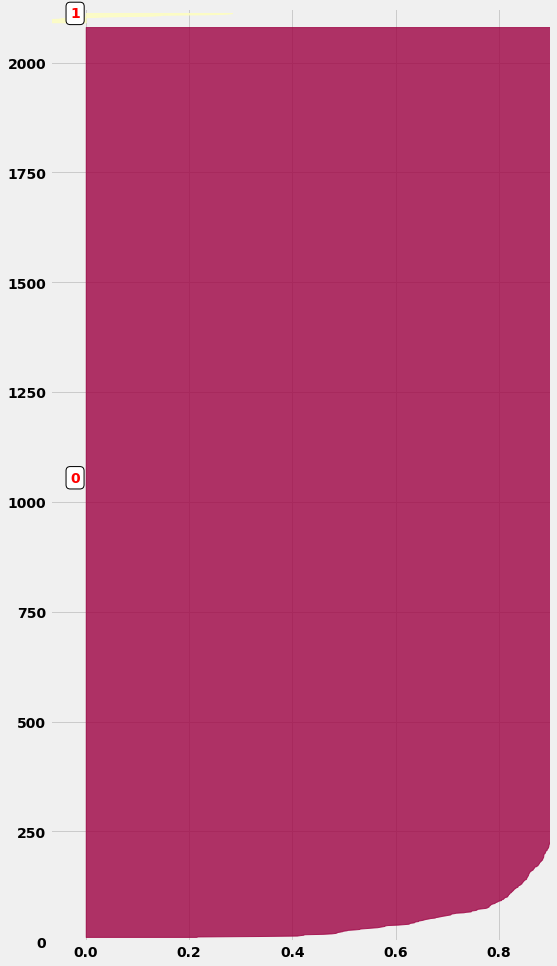

In [57]:

sample_silhouette_values = silhouette_samples(matrix, clusters)

graph_component_silhouette(n_clusters, [-0.07, 0.9], len(cat_table_final.copy().drop(['Channel_CONTAINER','Channel_WAREHOUSE'], axis =1)), sample_silhouette_values, clusters)